
##Analysis of Electronic Health Records (EHRs) Data in a Breast Cancer Patient Cohort
####  BY Yijie (Catherine) SHEN

## Startline

Begin by importing libraries.
* **Numpy**: This gives us the benefit of numpy arrays, this allows us the use of vectorised operations, this is faster than using loops. It is also the base for the other packages
* **Matplotlib**: for plotting and visualisations
* **Pandas** : This library is useful in machine learning, it enables the easy importation and manipulation of data; the pandas's dataframe is very easy and useful to work with, it also works well with other libraries becuase it gives the data some standard structure
* **Seaborn**: This package is for plotting and statistics
* **Wordcloud**: This package allows the use of some wordcloud functions
* **Linalg**: The functions from linalg are useful since vectorised operations are used frequently 
* **NLTK**: This library allows the use of nature language processing functions
* **Fuzzywuzzy**: This is a library of Python which is used for string matching.

In [ ]:
import os
from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
path = "/content/gdrive/My Drive/Colab Notebooks"
os.chdir(path)
import os
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [ ]:
!pip install wordcloud

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144792 sha256=3d76b43b772df90738d2507f3a7e58655e9aa53f730044cebe1c332ab870cb08
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [ ]:
# Useful starting lines
import pandas as pd
import numpy as np
import io
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import re
import string
import itertools
from functools import reduce
import ast
from itertools import permutations
#matplotlib inline
#autoreload 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#nature language processing
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('brown')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
import fuzzywuzzy
from fuzzywuzzy import process, fuzz

### Import the data 

The data was imported from a csv using the pandas library. The datatype was **pandas dataframe**.

In [ ]:
# Import the data using pandas library 
path = "https://github.com/CatherineSYJ/cancer2/blob/master/data2.xlsx?raw=true"
xl = pd.ExcelFile(path)
demographics = xl.parse("demographics")
attendance = xl.parse("attendance")
diagnosis = xl.parse("diagnosis")
procedure = xl.parse("procedure")
imaging = xl.parse("imaging")
pathology = xl.parse("pathology")
pharmacy = xl.parse("pharmacy")
path2 = "https://github.com/CatherineSYJ/cancer2/blob/master/dic.xlsx?raw=true"
x2 = pd.ExcelFile(path2)
dic = x2.parse("dic")

In [ ]:

#path3 = "https://github.com/CatherineSYJ/cancer/blob/master/HumanReadableMap.xlsx"
path3 = "https://github.com/CatherineSYJ/cancer2/blob/master/HumanReadableMap.xlsx?raw=true"
x3 = pd.ExcelFile(path3)
dic_snomed = x3.parse("Sheet2")

In [ ]:
#path4 = "https://github.com/CatherineSYJ/cancer/blob/master/path.xlsx"
path4 = "https://github.com/CatherineSYJ/cancer2/blob/master/path.xlsx?raw=true"
x4 = pd.ExcelFile(path4)
dic_path = x4.parse("Sheet2")

In [ ]:

#path4 = "https://github.com/CatherineSYJ/cancer/blob/master/Supplementary_Table.xlsx"
path5 = "https://github.com/CatherineSYJ/cancer2/blob/master/Supplementary_Table.xlsx?raw=true"
x5= pd.ExcelFile(path5)
Supplementary_Table = x5.parse("Supplementary_Table")

In [ ]:
#path6 = "https://github.com/CatherineSYJ/cancer/blob/master/df_table1.xlsx"
path6 = "https://github.com/CatherineSYJ/cancer2/blob/master/df_table1.xlsx?raw=true"
x6= pd.ExcelFile(path6)
df_table2 = x6.parse("df_table1")

In [ ]:

#path6 = "https://github.com/CatherineSYJ/cancer/blob/master/df_table1.xlsx"
path6 = "https://github.com/CatherineSYJ/cancer2/blob/master/df_table1.xlsx?raw=true"
x6= pd.ExcelFile(path6)
df_table2 = x6.parse("df_table1")

In [ ]:
#path7 = "https://github.com/CatherineSYJ/cancer/blob/master/drug_file.xlsx"
path7 = "https://github.com/CatherineSYJ/cancer2/blob/master/drug_file.xlsx?raw=true"
x7= pd.ExcelFile(path7)
drug_file = x7.parse("Sheet2")

In [ ]:
#path8 = "https://github.com/CatherineSYJ/cancer/blob/master/pharmacy.xlsx"
path8 = "https://github.com/CatherineSYJ/cancer2/blob/master/pharmacy.xlsx?raw=true"
x8= pd.ExcelFile(path8)
pharmacy_1 = x8.parse("Sheet2")

##   Data Validation

### TABLE Demographics
The columns in TABLE Demographics inculdes columns ID, Gender, Ethnicity. ID is for patients. Each patient has a unique ID. Gender and Ethnicity need to be specified according to the dictionary. This process includes :


*   Recognize missing value
*   Recognize wrangling data, e.g. different gender or ethnicity  with the same id
*   Recognize duplicated data, e.g. same gender or ethnicity  with the same id
*   Specify the ethnicity according to table - dictionary of ethnicity 

There are wrangling data  like patient '1869' and patient '2382' whose gender is not clear. We will extract features from Table Pathology and match corresponding data. 





In [ ]:
# Check the head of data 
demographics.head()

,id,gender,sex,ethnicity,asian_brit,black,white,mixed,other_ethnic_gp
0,1360,1,1,2,NaN,1.0,NaN,NaN,NaN
1,1441,1,1,6,NaN,NaN,1.0,NaN,NaN
2,1476,1,1,4,NaN,NaN,NaN,NaN,1.0
3,1536,1,1,6,NaN,NaN,1.0,NaN,NaN
4,1659,1,1,6,NaN,NaN,3.0,NaN,NaN


In [ ]:
# Check the missing value of data 
demographics.isnull().sum()

id                  0
gender              0
sex                 0
ethnicity           0
asian_brit         16
black              18
white               7
mixed              19
other_ethnic_gp    17
dtype: int64

In [ ]:
# Find duplicated values
duplicate_id = demographics[demographics.duplicated(['id','gender'])]
duplicate_id

,id,gender,sex,ethnicity,asian_brit,black,white,mixed,other_ethnic_gp
9,1823,1,1,6,NaN,NaN,1.0,NaN,NaN


In [ ]:
# Find duplicated values
duplicate_num = demographics[demographics.duplicated(['id'])]
wrangling_id = pd.concat([duplicate_num, duplicate_id]).drop_duplicates(keep=False)
wrangling_id

,id,gender,sex,ethnicity,asian_brit,black,white,mixed,other_ethnic_gp
11,1869,3,1,6,NaN,NaN,2.0,NaN,NaN
17,2382,3,1,6,NaN,NaN,1.0,NaN,NaN


In [ ]:
# Drop duplicated rows
demographics.drop([9])

,id,gender,sex,ethnicity,asian_brit,black,white,mixed,other_ethnic_gp
0,1360,1,1,2,NaN,1.0,NaN,NaN,NaN
1,1441,1,1,6,NaN,NaN,1.0,NaN,NaN
2,1476,1,1,4,NaN,NaN,NaN,NaN,1.0
3,1536,1,1,6,NaN,NaN,1.0,NaN,NaN
4,1659,1,1,6,NaN,NaN,3.0,NaN,NaN
5,1691,1,1,4,NaN,NaN,NaN,NaN,1.0
6,1777,1,1,1,1.0,NaN,NaN,NaN,NaN
7,1779,1,1,6,NaN,NaN,1.0,NaN,NaN
8,1823,1,1,6,NaN,NaN,1.0,NaN,NaN
10,1869,1,1,6,NaN,NaN,2.0,NaN,NaN


In [ ]:
# Rename the column
dic.columns=['ethnicity','detail','num']
# Replace the category number
dic['ethnicity_type'] = dic['ethnicity']
dic['ethnicity'] = dic['ethnicity'].str.replace('asian_brit','1')
dic['ethnicity'] = dic['ethnicity'].str.replace('black','2')
dic['ethnicity'] = dic['ethnicity'].str.replace('white','6')
dic['ethnicity'] = dic['ethnicity'].str.replace('mixed','3')
dic['ethnicity'] = dic['ethnicity'].str.replace('other_ethnic_gp','4')

#Split the data into rows
dic_new = pd.concat([pd.Series(row['ethnicity'], row['detail'].split('|'))              
                    for _, row in dic.iterrows()]).reset_index().rename(columns={0:'ethnicity_general_num'})
dic_2 = dic_new["index"].str.split(",", n = 1, expand = True)
dic_new["ethnicity_detail_num"]= dic_2[0] 
dic_new["Detail"]= dic_2[1] 
dic_new.drop(columns =["index"], inplace = True) 
dic_new['ethnicity_detail_num'] = dic_new['ethnicity_detail_num'].str.strip()

# Combine the column
demographics['asian_brit'].update(demographics.pop('black'))
demographics['asian_brit'].update(demographics.pop('white'))
demographics['asian_brit'].update(demographics.pop('mixed'))
demographics['asian_brit'].update(demographics.pop('other_ethnic_gp'))

# Drop the NAN column
demographics.dropna()

# Change the data type
demographics['ethnicity'] = demographics['ethnicity'].astype(np.str)
demographics['ethnicity'] = demographics['ethnicity'].str.strip()
demographics['ethnicity'] = demographics['ethnicity'].astype(np.int16)
demographics.columns=['id','gender','sex','ethnicity_general_num','ethnicity_detail_num']

# Drop NaN rows
dic_new1=dic_new.dropna()
demographics_new=demographics.dropna()

# Change the data type
dic_new1['ethnicity_detail_num'] = dic_new1['ethnicity_detail_num'].astype(np.int16)
dic_new1['ethnicity_general_num'] = dic_new1['ethnicity_general_num'].astype(np.int16)
demographics_new['ethnicity_general_num'] = demographics_new['ethnicity_general_num'].astype(np.int16)
demographics_new['ethnicity_detail_num'] = demographics_new['ethnicity_detail_num'].astype(np.int16)

# Merge Table diagnosis and Dictionary
new_df = pd.merge(demographics_new,dic_new1,how='left',on=['ethnicity_general_num','ethnicity_detail_num'])
new_df1=new_df.drop('ethnicity_general_num',1)
new_df1.columns=['id','gender','sex','ethnicity_group','ethnicity']
new_df1['ethnicity_group'] = new_df1['ethnicity_group'].map({1: 'Asian', 2: 'Black',6:'White',3:'Mixed',4:'Other'})
new_df1['gender'] = new_df1['gender'].map({1: 'Female', 2: 'Male',3:'Unknown'})
new_df1['sex'] = new_df1['sex'].map({1: 'Female', 2: 'Male',3:'Unknown'})

new_df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,gender,sex,ethnicity_group,ethnicity
0,1360,Female,Female,Asian,Black or Black British - Any other
1,1441,Female,Female,Asian,White - British
2,1476,Female,Female,Asian,Other ethnic group - Any other
3,1536,Female,Female,Asian,White - British
4,1659,Female,Female,Mixed,White - Other
5,1691,Female,Female,Asian,Other ethnic group - Any other
6,1777,Female,Female,Asian,Asian or Asian British - Any other background
7,1779,Female,Female,Asian,White - British
8,1823,Female,Female,Asian,White - British
9,1823,Female,Female,Asian,White - British



### TABLE Attendance

The columns in TABLE Attendance include ID, Date, Site, Description, Treatment Specialty Description, HRG Code, HRG Description. Date is the date when patients are sent to the hospital.
Site is hospital site.
Description is for different sources of patients include ‘Regular Day Admission’, ‘Follow Up Operation’, ‘New Operation’.
HRG Code is derived for each attendance record.
HRG Description describe HRG Code in readable words. 
This process includes:

*   Check missing value
*   Bar Chart for all treatments(hrg code)
*   Bar Chart for Top 10 treatment(hrg code)
*   Word Cloud for Treatment(hrg code)



In [ ]:
# Check the head of data 
attendance.head()

,id,date,site,desc,treatment_specialty_desc,hrg_code,hrg_desc
0,1360,23-09-15,SBH,Regular Day Admission,MEDICAL ONCOLOGY,JA12C,Malignant Breast Disorders without CC
1,1360,21-10-15,SBH,Regular Day Admission,MEDICAL ONCOLOGY,JA12C,Malignant Breast Disorders without CC
2,1360,18-11-15,SBH,Regular Day Admission,MEDICAL ONCOLOGY,HD40B,"Malignancy of Bone or Connective Tissue, with ..."
3,1360,04-05-08,RLH,Follow Up OP,DERMATOLOGY,WF01A,"Non-Admitted Face-to-Face Attendance, Follow-up"
4,1360,17-08-08,RLH,Follow Up OP,DERMATOLOGY,WF01A,"Non-Admitted Face-to-Face Attendance, Follow-up"


In [ ]:
# Check the missing value of data 
attendance.isnull().sum()

id                          0
date                        0
site                        0
desc                        0
treatment_specialty_desc    0
hrg_code                    0
hrg_desc                    5
dtype: int64

In [ ]:
# Split the cell 
attendance["hrg_desc"]= attendance["hrg_desc"].str.split(",")
attendance["date"] = pd.to_datetime(attendance["date"])
attendance.head()

,id,date,site,desc,treatment_specialty_desc,hrg_code,hrg_desc
0,1360,2015-09-23,SBH,Regular Day Admission,MEDICAL ONCOLOGY,JA12C,[Malignant Breast Disorders without CC]
1,1360,2015-10-21,SBH,Regular Day Admission,MEDICAL ONCOLOGY,JA12C,[Malignant Breast Disorders without CC]
2,1360,2015-11-18,SBH,Regular Day Admission,MEDICAL ONCOLOGY,HD40B,"[Malignancy of Bone or Connective Tissue, wit..."
3,1360,2008-04-05,RLH,Follow Up OP,DERMATOLOGY,WF01A,"[Non-Admitted Face-to-Face Attendance, Follow..."
4,1360,2008-08-17,RLH,Follow Up OP,DERMATOLOGY,WF01A,"[Non-Admitted Face-to-Face Attendance, Follow..."


In [ ]:
# Convert the column type into object
attendance['hrg_code'] = attendance['hrg_code'].astype(np.object)
counts = attendance['hrg_code'].value_counts()

In [ ]:
attendance_11 = attendance['id']
attendance_11 .drop_duplicates(keep = "first") 

0      1360
38     1441
45     1476
97     1536
132    1659
159    1691
209    1777
332    1779
339    1823
390    1869
463    2014
571    2069
727    2163
773    2183
855    2382
917    2388
945    2389
Name: id, dtype: int64

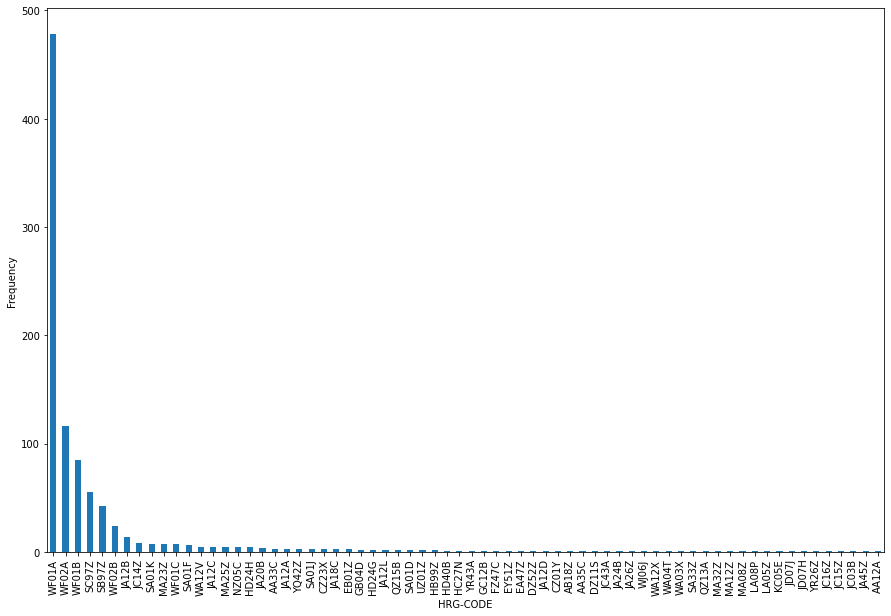

In [ ]:

# Bar chart for all treatments
treatment = attendance.groupby('hrg_code')
plt.figure(figsize=(15,10))
treatment.size().sort_values(ascending=False).plot.bar()
plt.xlabel("HRG-CODE")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'TOP 10 HRG-CODE')

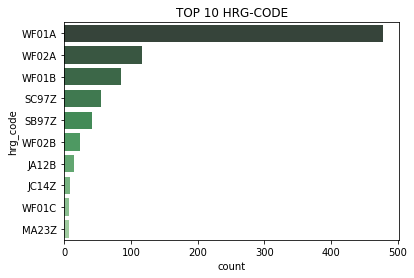

In [ ]:
# Bar chart for Top 10 treatment
sns.countplot(y="hrg_code", data=attendance, palette="Greens_d",
              order=attendance['hrg_code'].value_counts().iloc[:10].index).set_title('TOP 10 HRG-CODE')

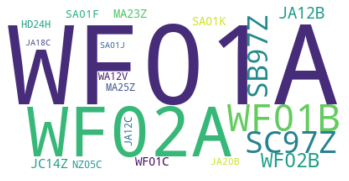

In [ ]:
# Word Cloud for Treatment
counts.index = counts.index.map(str)
wordcloud = WordCloud(max_font_size=500, max_words=20, background_color="white").generate_from_frequencies(counts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### TABLE Diagnose
The columns in TABLE Demographics includes: ID, Date, Code, Description.Date is the date when the diagnosis is recorded.
Code is ICD-10 which is a medical classification list.
Description describe ICD-10 in readable words.

This process includes:


*   Check missing value
*   Drop duplicated code according to each patient
*   Bar chart for TOP 5 Diagnosis Code 
*   Heatmap (Comorbidity Analysis)
*   Co-occurrence Analysis



In [ ]:
# Check the head of data 
diagnosis.head()

,id,date,code,desc
0,1360,29-12-11,C509;Z511,"Malignant neoplasm: Breast, unspecified;Chemot..."
1,1360,06-01-12,C509,"Malignant neoplasm: Breast, unspecified"
2,1360,11-01-12,Z452;C503;Z901,Adjustment and management of vascular access d...
3,1360,16-01-12,C509;Z901;R458;Z082,"Malignant neoplasm: Breast, unspecified;Acquir..."
4,1360,18-01-12,C509;Z511;R458;Z901,"Malignant neoplasm: Breast, unspecified;Chemot..."


In [ ]:
# Split the cell
s1 = diagnosis.code.str.split(';', expand=True).stack().str.strip().reset_index(level=1, drop=True)
s2 = diagnosis.desc.str.split(';', expand=True).stack().str.strip().reset_index(level=1, drop=True)
a_diagnosis = pd.concat([s1, s2], join="inner",axis=1).rename(columns={0:'code',1:'desc'})

In [ ]:



#Split the cell, format datatime
diagnosis["code"]= diagnosis["code"].str.split(";")
diagnosis["desc"]= diagnosis["desc"].str.split(";")
diagnosis["date"] = pd.to_datetime(diagnosis["date"])
diagnosis.head()

,id,date,code,desc
0,1360,2011-12-29,"[C509, Z511]","[Malignant neoplasm: Breast, unspecified, Chem..."
1,1360,2012-06-01,[C509],"[Malignant neoplasm: Breast, unspecified]"
2,1360,2012-11-01,"[Z452, C503, Z901]",[Adjustment and management of vascular access ...
3,1360,2012-01-16,"[C509, Z901, R458, Z082]","[Malignant neoplasm: Breast, unspecified, Acqu..."
4,1360,2012-01-18,"[C509, Z511, R458, Z901]","[Malignant neoplasm: Breast, unspecified, Chem..."


In [ ]:
# Reset index, Rename the column
diagnosis_1 = diagnosis[['id','code']]

# Merge the rows with same ID
diagnosis_2 = pd.DataFrame({'ID':np.repeat(diagnosis_1.id.values,diagnosis_1.code.str.len()),
                        'code':np.concatenate(diagnosis_1.code.values)})
diagnosis_3=diagnosis_2.groupby(["ID"])['code'].apply(list)
diagnosis_4 = pd.DataFrame([diagnosis_3])
diagnosis_4 = diagnosis_4.stack().reset_index()
diagnosis_4.columns = ['C','ID','code']
diagnosis_5=diagnosis_4.drop(['C'],axis=1)

Text(0.5, 1.0, 'TOP 5 Diagnosis Code')

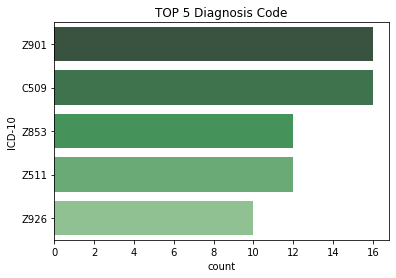

In [ ]:
#Remove the duplicated value with same ID 
#Bar chart for TOP 10 Diagnosis Code  (exclusive according to id)
temp_list = []
for rows in diagnosis_4['code']:
  temp = set(rows)
  temp_1 = list(temp)
  for i in temp_1:
    temp_list.append(i)

diagnosis_temp = pd.DataFrame(temp_list,columns=['ICD-10'])
sns.countplot(y='ICD-10', data=diagnosis_temp, palette="Greens_d",
              order=diagnosis_temp['ICD-10'].value_counts().iloc[:5].index).set_title('TOP 5 Diagnosis Code')

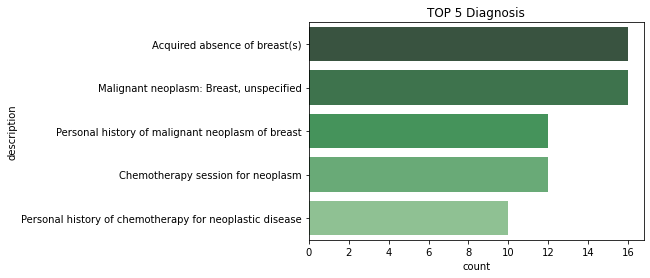

In [ ]:
# Rename the name of column
diagnosis_temp.columns=['code']

# Keep the exclusive value
b = a_diagnosis.drop_duplicates(subset='code', keep="last")

# Merge two dataframe
c = diagnosis_temp.merge(b,on='code')

c.columns = ['code', 'description']

# Plot Top 5 Diagnosis Description
countplot_dig = sns.countplot(y='description', data=c, palette="Greens_d",
              order=c['description'].value_counts().iloc[:5].index).set_title('TOP 5 Diagnosis')


In [ ]:
from google.colab import files
plt.savefig("countplot_dig.png")
files.download("countplot_dig.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Delete the duplicated items in each rows
diagnosis_5['code'] = diagnosis_5['code'].apply(lambda x: list(set(x)))

In [ ]:
# Delete the duplicated items in each rows
diagnosis_5['code'] = diagnosis_5['code'].apply(lambda x: list(set(x)))
diagnosis_5_1 = pd.DataFrame({'ID':np.repeat(diagnosis_5.ID.values,diagnosis_5.code.str.len()),
                        'CODE':np.concatenate(diagnosis_5.code.values)})
diagnosis_5_2 = diagnosis_5_1.groupby('CODE')['ID'].apply(list).to_frame('Id').reset_index()
# remove'C509','Z511'
diagnosis_5_2 = diagnosis_5_2[diagnosis_5_2.CODE != 'C509']
diagnosis_5_2 = diagnosis_5_2[diagnosis_5_2.CODE != 'Z511']
diagnosis_5_4 = diagnosis_5_2.set_index('CODE').T.apply(list).to_dict('r')
for item in diagnosis_5_4:
  a = item

In [ ]:
# 2 pairs
# Create a list
a_list = []
for i in a.keys():
  a_list.append(i)
# Create a dictionary
dic = {}
dic_len = {}
k=[]
for i in range(0,len(a_list)-1):
  for j in range(i+1,len(a_list)):
    if len(set(a[a_list[i]]).intersection(set(a[a_list[j]]))) > 1 :
      c=[]
      #d = set()
      c.append(a_list[i])
      c.append(a_list[j])
      d = tuple(c)
      #d.add(c)
      k.append(d)
      j = set(a[a_list[i]]).intersection(set(a[a_list[j]]))
      dic[d]=j

In [ ]:
# 3 pairs

# Create a list
a_list3 = []
for i in dic.keys():
  a_list3.append(i)

# Create a dictionary
dic_3 = {}
dic_len3 = {}
k3=[]
for i in range(0,len(a_list3)):
  for j in range(0,len(a_list)):
    s1 = set(a[a_list3[i][0]])
    s2 = set(a[a_list3[i][1]])
    s3 = set(a[a_list[j]])
    if a_list3[i][0] != a_list3[i][1] and a_list[j] != a_list3[i][0] and a_list3[i][1] != a_list[j]:
      if len(set.intersection(s1, s2, s3)) > 1:
        c=[]
        c.append(a_list3[i][0])
        c.append(a_list3[i][1])
        c.append(a_list[j])
        d = tuple(c)
        k3.append(d)
        j = set(a[a_list3[i][0]]) & set(a[a_list3[i][1]]) & set(a[a_list[j]])
        dic_3[d]=j


In [ ]:
# 4 pairs

# Create a list
a_list4 = []
for i in dic_3.keys():
  a_list4.append(i)

# Create a dictionary
dic_4 = {}
dic_len4 = {}
k4=[]
for i in range(0,len(a_list4)):
  for j in range(0,len(a_list)):
    s1 = set(a[a_list4[i][0]])
    s2 = set(a[a_list4[i][1]])
    s3 = set(a[a_list4[i][2]])
    s4 = set(a[a_list[j]])
    if a_list4[i][0] != a_list4[i][1] and a_list4[i][0] != a_list4[i][2] and a_list4[i][1] != a_list4[i][2] and a_list[j] != a_list4[i][0] and a_list4[i][1] != a_list[j] and a_list4[i][2] != a_list[j]:
      if len(set.intersection(s1, s2, s3,s4)) >1:
        c=[]
        c.append(a_list4[i][0])
        c.append(a_list4[i][1])
        c.append(a_list4[i][2])
        c.append(a_list[j])
        d = tuple(c)
        k4.append(d)
        j = set(a[a_list4[i][0]]) & set(a[a_list4[i][1]]) & set(a[a_list4[i][2]]) & set(a[a_list[j]])
        dic_4[d]=j

In [ ]:
# 5 pairs

# Create a list
a_list5 = []
for i in dic_4.keys():
  a_list5.append(i)

# Create a dictionary
dic_5 = {}
dic_len5 = {}
k5=[]
for i in range(0,len(a_list5)):
  for j in range(0,len(a_list)):
    s1 = set(a[a_list5[i][0]])
    s2 = set(a[a_list5[i][1]])
    s3 = set(a[a_list5[i][2]])
    s4 = set(a[a_list5[i][3]])
    s5 = set(a[a_list[j]])
    if a_list5[i][0] != a_list5[i][1] and a_list5[i][0] != a_list5[i][2] and a_list5[i][1] != a_list5[i][2] and a_list[j] != a_list5[i][0] and a_list5[i][1] != a_list[j] and a_list5[i][2] != a_list[j] and a_list5[i][3] != a_list5[i][0] and a_list5[i][3] != a_list5[i][1] and a_list5[i][3] != a_list5[i][2] and a_list5[i][3] != a_list[j]:
      if len(set.intersection(s1, s2, s3,s4,s5)) > 1:
        c=[]
        c.append(a_list5[i][0])
        c.append(a_list5[i][1])
        c.append(a_list5[i][2])
        c.append(a_list5[i][3])
        c.append(a_list[j])
        d = tuple(c)
        k5.append(d)
        j = set(a[a_list5[i][0]]) & set(a[a_list5[i][1]]) & set(a[a_list5[i][2]]) & set(a[a_list5[i][3]]) & set(a[a_list[j]])
        dic_5[d]=j

In [ ]:
# 6 pairs

# Create a list
a_list6 = []
for i in dic_5.keys():
  a_list6.append(i)

# Create a dictionary
dic_6 = {}
dic_len6 = {}
k6=[]
for i in range(0,len(a_list6)):
  for j in range(0,len(a_list)):
    s1 = set(a[a_list6[i][0]])
    s2 = set(a[a_list6[i][1]])
    s3 = set(a[a_list6[i][2]])
    s4 = set(a[a_list6[i][3]])
    s5 = set(a[a_list6[i][4]])
    s6 = set(a[a_list[j]])
    if a_list6[i][0] != a_list6[i][1] and a_list6[i][0] != a_list6[i][2] and a_list6[i][1] != a_list6[i][2] and a_list[j] != a_list6[i][0] and a_list6[i][1] != a_list[j] and a_list6[i][2] != a_list[j] and a_list6[i][3] != a_list6[i][0] and a_list6[i][3] != a_list6[i][1] and a_list6[i][3] != a_list6[i][2] and a_list6[i][3] != a_list[j] and a_list6[i][0] != a_list6[i][4] and a_list6[i][1] != a_list6[i][4] and a_list6[i][2] != a_list6[i][4] and a_list6[i][3] != a_list6[i][4] and a_list6[i][4] != a_list[j]:
      if len(set.intersection(s1, s2, s3,s4,s5,s6)) > 1:
        c=[]
        c.append(a_list6[i][0])
        c.append(a_list6[i][1])
        c.append(a_list6[i][2])
        c.append(a_list6[i][3])
        c.append(a_list6[i][4])
        c.append(a_list[j])
        d = tuple(c)
        k6.append(d)
        j = set(a[a_list6[i][0]]) & set(a[a_list6[i][1]]) & set(a[a_list6[i][2]]) & set(a[a_list6[i][3]]) & set(a[a_list6[i][4]]) & set(a[a_list[j]])
        dic_6[d]=j

In [ ]:
list_dic2 = [ v for v in dic.values() ]
list_dic3 = [ v for v in dic_3.values() ]
list_dic4 = [ v for v in dic_4.values() ]
list_dic5 = [ v for v in dic_5.values() ]
list_dic6 = [ v for v in dic_6.values() ]

In [ ]:
set_dic2 = set()
set_dic3 = set()
set_dic4 = set()
set_dic5 = set()
set_dic6 = set()

In [ ]:
for i in list_dic2:
  for j in i:
    set_dic2.add(j)

for i in list_dic3:
  for j in i:
    set_dic3.add(j)

for i in list_dic4:
  for j in i:
    set_dic4.add(j)

for i in list_dic5:
  for j in i:
    set_dic5.add(j)

for i in list_dic6:
  for j in i:
    set_dic6.add(j)


In [ ]:
# Delete the duplicated items in each rows
diagnosis_5['code'] = diagnosis_5['code'].apply(lambda x: list(set(x)))

# Print Pairs
temp=[]
for rows in diagnosis_5['code']:
  for pair in itertools.combinations(rows,2):
    a = (",".join(map(str, pair)))
    d_a = a.split(",")
    t_a = tuple(d_a)
    temp.append(t_a)

# Map each pair into dictionary
dic_p = {}
for i in temp:
  if i in dic_p:
    dic_p[i]+=1
  else:
    dic_p[i]=1

# Sort the dictionary according to the frequency
sorted_p = sorted(dic_p.items(), key=lambda kv: kv[1],reverse=True)


In [ ]:
# Validate the accuracy of comorbidity pairs
i = 0
y = 0
for row in diagnosis_5['code']:
  for item in row:
    if item == 'C509':
      i+=1
    if item == 'Z853':
      y+=1
print(i)
print(y)

16
12


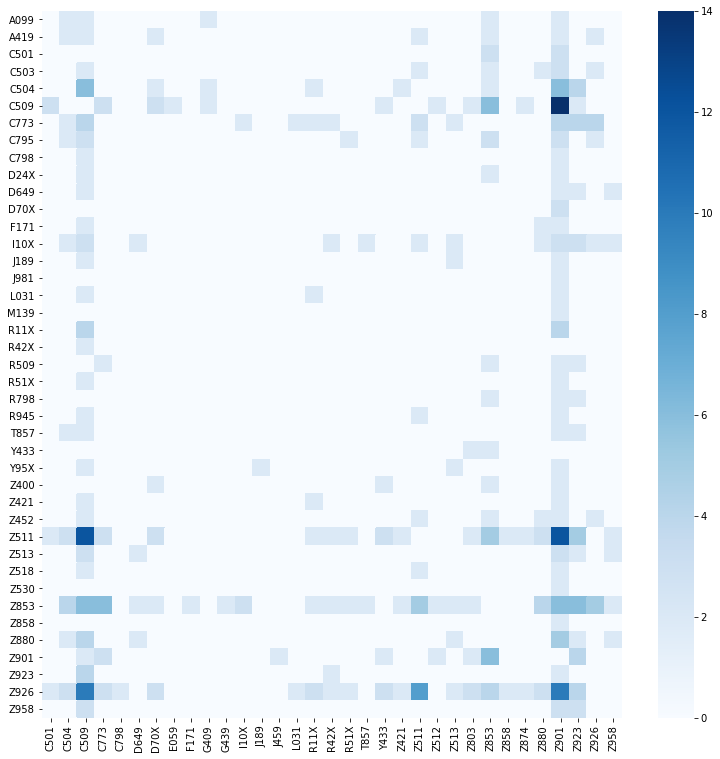

In [ ]:
#HeatMap plot
dic_p1 = {key:val for key, val in dic_p.items() if val >= 2}
ser = pd.Series(list(dic_p1.values()),
                  index=pd.MultiIndex.from_tuples(dic_p1.keys()))
df_p = ser.unstack().fillna(0)
plt.figure(figsize = (13,13))
sns.heatmap(df_p,cmap="Blues",xticklabels=True, yticklabels=True)

In [ ]:
# Check the missing value of data 
diagnosis.isnull().sum()

### TABLE Procedure


The columns in TABLE Procedure includes: ID, Date, Code, Description.Date is the date when the diagnosis is recorded.
Date is the date when the procedure is recorded.
Code is Biobank Code which is a medical classification list.
Description describe Biobank Code in readable words.


This process includes:


*   Check missing value
*   Drop duplicated code according to each patient
*   Bar chart for TOP 5 Procedure Code 
*   Heatmap (Relationship between two procedures)





In [ ]:
# Check the head of data 
procedure.head()

,id,date,code,desc
0,1360,23-05-14,F421;F241;E271,Biopsy of lesion of mouth NEC;Biopsy of lesion...
1,1360,23-09-15,X384;X391,Subcutaneous chemotherapy;Oral administration ...
2,1360,21-10-15,X384,Subcutaneous chemotherapy
3,1360,18-11-15,X384,Subcutaneous chemotherapy
4,1476,14-03-16,X369,Unspecified blood withdrawal


In [ ]:
# Split the column
s1 = procedure.code.str.split(';', expand=True).stack().str.strip().reset_index(level=1, drop=True)
s2 = procedure.desc.str.split(';', expand=True).stack().str.strip().reset_index(level=1, drop=True)
a_procedure = pd.concat([s1, s2], join="inner",axis=1).rename(columns={0:'code',1:'desc'})

In [ ]:
#Split the cell, format datetime
procedure["code"]= procedure["code"].str.split(";")
procedure["desc"]= procedure["desc"].str.split(";")
procedure["date"] = pd.to_datetime(procedure["date"])
procedure.head()

,id,date,code,desc
0,1360,2014-05-23,"[F421, F241, E271]","[Biopsy of lesion of mouth NEC, Biopsy of lesi..."
1,1360,2015-09-23,"[X384, X391]","[Subcutaneous chemotherapy, Oral administratio..."
2,1360,2015-10-21,[X384],[Subcutaneous chemotherapy]
3,1360,2015-11-18,[X384],[Subcutaneous chemotherapy]
4,1476,2016-03-14,[X369],[Unspecified blood withdrawal]


In [ ]:
# Reset index, Rename the column
procedure_1 = procedure[['id','code']]

# Merge the rows with same ID
procedure_2 = pd.DataFrame({'ID':np.repeat(procedure_1.id.values,procedure_1.code.str.len()),
                        'code':np.concatenate(procedure_1.code.values)})
procedure_3=procedure_2.groupby(["ID"])['code'].apply(list)
procedure_4 = pd.DataFrame([procedure_3])
procedure_4 = procedure_4.stack().reset_index()
procedure_4.columns = ['C','ID','code']
procedure_5=procedure_4.drop(['C'],axis=1)


Text(0.5, 1.0, 'TOP 5 Procedure Code')

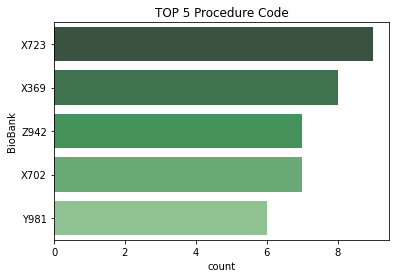

In [ ]:
# Bar chart for TOP 5 Diagnosis Code (exclusive according to id)
procedure_list = []
for rows in procedure_4['code']:
  temp = set(rows)
  temp_1 = list(temp)
  for i in temp_1:
    procedure_list.append(i)
procedure_temp = pd.DataFrame(procedure_list,columns=['BioBank'])
sns.countplot(y='BioBank', data=procedure_temp, palette="Greens_d",
              order=procedure_temp['BioBank'].value_counts().iloc[:5].index).set_title('TOP 5 Procedure Code')

In [ ]:
procedure_4

,C,ID,code
0,code,1360,"[F421, F241, E271, X384, X391, X384, X384]"
1,code,1476,"[X369, X292, X292, X292, X292, X292, X292]"
2,code,1536,"[B279, Z942, Q171]"
3,code,1659,"[X292, X292, X292, X292, X292, X292, B304, Z941]"
4,code,1691,"[X715, X722, X715, X722, X713, X723, X713, X723]"
5,code,1777,"[T873, O142, Z943, X712, X722, X711, X723, X71..."
6,code,1779,"[X702, X723]"
7,code,1823,"[X702, X723, X702, X723, X702, X723, L997, Z94..."
8,code,1869,"[X702, X723, X702, X723, X702, X723, X702, X72..."
9,code,2014,"[X332, X363, X333, X363, X333, X363, B274, T87..."


Text(0.5, 1.0, 'TOP 5 Procedure')

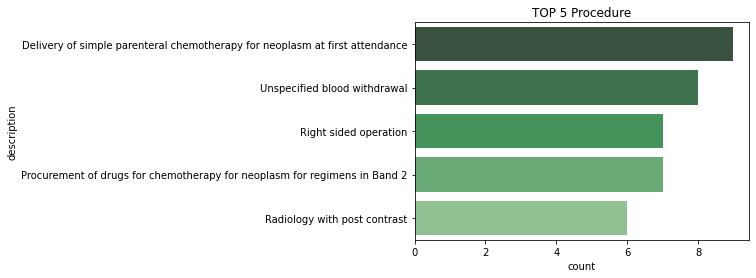

In [ ]:
# Rename the name of column
procedure_temp.columns=['code']

# Keep the exclusive value
b = a_procedure.drop_duplicates(subset='code', keep="last")

# Merge two dataframe
c = procedure_temp.merge(b,on='code')
c.columns = ['code', 'description']
# Plot Top 5 Diagnosis Description
sns.countplot(y='description', data=c, palette="Greens_d",label='big',
              order=c['description'].value_counts().iloc[:5].index).set_title('TOP 5 Procedure')
              

In [ ]:
# Delete the duplicated items in each rows
procedure_5['code'] = procedure_5['code'].apply(lambda x: list(set(x)))

# Print Pairs
temp=[]
for rows in procedure_5['code']:
  for pair in itertools.combinations(rows,2):
    temp.append(pair)

# Map each pair into dictionary
dic_p = {}
for i in temp:
  if i in dic_p:
    dic_p[i]+=1
  else:
    dic_p[i]=1

# Sort the dictionary according to the frequency
sorted_p = sorted(dic_p.items(), key=lambda kv: kv[1],reverse=True)
sorted_p

[(('Y973', 'Y981'), 6),
 (('Z943', 'Z942'), 5),
 (('Y973', 'Z942'), 5),
 (('Y981', 'Z942'), 5),
 (('X702', 'X369'), 5),
 (('Z943', 'Y981'), 4),
 (('Z943', 'T873'), 4),
 (('Y973', 'X711'), 4),
 (('O142', 'Z942'), 4),
 (('O142', 'T873'), 4),
 (('X723', 'Z942'), 4),
 (('X723', 'X711'), 4),
 (('Z942', 'T873'), 4),
 (('X723', 'X702'), 4),
 (('Y973', 'X702'), 4),
 (('X702', 'Y981'), 4),
 (('Z943', 'X369'), 4),
 (('X723', 'X369'), 4),
 (('Y973', 'X369'), 4),
 (('X722', 'X723'), 3),
 (('X713', 'X723'), 3),
 (('Y973', 'X723'), 3),
 (('Y973', 'T873'), 3),
 (('O142', 'Y981'), 3),
 (('Y532', 'Y981'), 3),
 (('Y981', 'X723'), 3),
 (('Y981', 'X711'), 3),
 (('Y981', 'T873'), 3),
 (('X723', 'T852'), 3),
 (('T852', 'T873'), 3),
 (('X723', 'L997'), 3),
 (('X723', 'U052'), 3),
 (('L997', 'Z943'), 3),
 (('L997', 'Z942'), 3),
 (('Z941', 'Y973'), 3),
 (('Z941', 'Z943'), 3),
 (('Z941', 'Y981'), 3),
 (('Z941', 'Z942'), 3),
 (('Y973', 'Z943'), 3),
 (('Y973', 'U052'), 3),
 (('X702', 'U052'), 3),
 (('X702', 'Z942

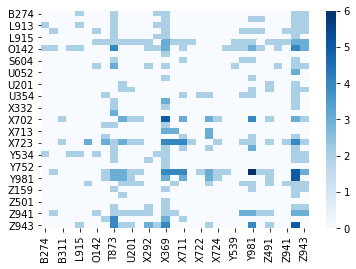

In [ ]:
#HeatMap plot
dic_p1 = {key:val for key, val in dic_p.items() if val >= 2}
ser = pd.Series(list(dic_p1.values()),
                  index=pd.MultiIndex.from_tuples(dic_p1.keys()))
df_p = ser.unstack().fillna(0)
sns.heatmap(df_p,cmap="Blues")

In [ ]:
# Co-occurrence analysis
# Print top 3/N procedure code
# List with three/N items tuple
three_tuple2 = []
tup_set2=[]
for rows in procedure_5["code"]:
  for i in permutations(rows, 3):
    three_tuple2.append(i)

for rows in three_tuple2:
  tup2 = tuple(rows)
  tup_set2.append(tup2 )

# Map each pair into dictionary
dic_p32 = {}
for i in tup_set2:
  if i in dic_p32:
    dic_p32[i]+=1
  else:
    dic_p32[i]=1

# Sort the dictionary according to the frequency
sorted_p32 = sorted(dic_p32.items(), key=lambda kv: kv[1],reverse=True)

sorted_p32

[(('Y973', 'Y981', 'X723'), 5),
 (('Y973', 'Y981', 'Z942'), 5),
 (('Y973', 'X723', 'Y981'), 5),
 (('Y973', 'Z942', 'Y981'), 5),
 (('Y981', 'Y973', 'X723'), 5),
 (('Y981', 'Y973', 'Z942'), 5),
 (('Y981', 'X723', 'Y973'), 5),
 (('Y981', 'Z942', 'Y973'), 5),
 (('X723', 'Y973', 'Y981'), 5),
 (('X723', 'Y981', 'Y973'), 5),
 (('Z942', 'Y973', 'Y981'), 5),
 (('Z942', 'Y981', 'Y973'), 5),
 (('X702', 'X723', 'X369'), 5),
 (('X702', 'X369', 'X723'), 5),
 (('X723', 'X702', 'X369'), 5),
 (('X723', 'X369', 'X702'), 5),
 (('X369', 'X702', 'X723'), 5),
 (('X369', 'X723', 'X702'), 5),
 (('Z943', 'Y973', 'Y981'), 4),
 (('Z943', 'Y973', 'Z942'), 4),
 (('Z943', 'O142', 'Z942'), 4),
 (('Z943', 'O142', 'T873'), 4),
 (('Z943', 'Y981', 'Y973'), 4),
 (('Z943', 'Y981', 'Z942'), 4),
 (('Z943', 'Z942', 'Y973'), 4),
 (('Z943', 'Z942', 'O142'), 4),
 (('Z943', 'Z942', 'Y981'), 4),
 (('Z943', 'Z942', 'T873'), 4),
 (('Z943', 'T873', 'O142'), 4),
 (('Z943', 'T873', 'Z942'), 4),
 (('Y973', 'Z943', 'Y981'), 4),
 (('Y973

In [ ]:
# Co-occurrence analysis
# Print top 4/N procedure code
# List with three/N items tuple
three_tuple2 = []
tup_set2=[]
for rows in procedure_5["code"]:
  for i in permutations(rows, 4):
    three_tuple2.append(i)

for rows in three_tuple2:
  tup2 = tuple(rows)
  tup_set2.append(tup2 )

# Map each pair into dictionary
dic_p32 = {}
for i in tup_set2:
  if i in dic_p32:
    dic_p32[i]+=1
  else:
    dic_p32[i]=1

# Sort the dictionary according to the frequency
sorted_p32 = sorted(dic_p32.items(), key=lambda kv: kv[1],reverse=True)

sorted_p32

[(('Z943', 'Y973', 'Y981', 'Z942'), 4),
 (('Z943', 'Y973', 'Z942', 'Y981'), 4),
 (('Z943', 'O142', 'Z942', 'T873'), 4),
 (('Z943', 'O142', 'T873', 'Z942'), 4),
 (('Z943', 'Y981', 'Y973', 'Z942'), 4),
 (('Z943', 'Y981', 'Z942', 'Y973'), 4),
 (('Z943', 'Z942', 'Y973', 'Y981'), 4),
 (('Z943', 'Z942', 'O142', 'T873'), 4),
 (('Z943', 'Z942', 'Y981', 'Y973'), 4),
 (('Z943', 'Z942', 'T873', 'O142'), 4),
 (('Z943', 'T873', 'O142', 'Z942'), 4),
 (('Z943', 'T873', 'Z942', 'O142'), 4),
 (('Y973', 'Z943', 'Y981', 'Z942'), 4),
 (('Y973', 'Z943', 'Z942', 'Y981'), 4),
 (('Y973', 'Y981', 'Z943', 'Z942'), 4),
 (('Y973', 'Y981', 'X723', 'Z942'), 4),
 (('Y973', 'Y981', 'X723', 'X711'), 4),
 (('Y973', 'Y981', 'Z942', 'Z943'), 4),
 (('Y973', 'Y981', 'Z942', 'X723'), 4),
 (('Y973', 'Y981', 'X711', 'X723'), 4),
 (('Y973', 'X723', 'Y981', 'Z942'), 4),
 (('Y973', 'X723', 'Y981', 'X711'), 4),
 (('Y973', 'X723', 'Z942', 'Y981'), 4),
 (('Y973', 'X723', 'X711', 'Y981'), 4),
 (('Y973', 'Z942', 'Z943', 'Y981'), 4),


In [ ]:
# Check the missing value of data 
procedure.isnull().sum()

id      0
date    0
code    0
desc    0
dtype: int64

### TABLE Imaging


 
The columns in TABLE Imaging include ID, Order Date, Imaging Date, Referral Type, Site, Treatment Function Code, Treatment Function Name, Imaging Code, Imaging Name, Imaging Modality, Report Date, Report.









In [ ]:
# Check the head of data 
imaging.head()

,id,order_date,referral_type,imaging_date,site,treatment_function_code,treatment_function_name,imaging_code,imaging_name,imaging_modality,report_date,report
0,1360,07-01-15,Outpatient,13-01-15,EXT,330,DERMATOLOGY,CCHAP,CT Chest/Abdomen/Pelvis,CT,13-02-15,"29/12/2014, 10:14, CT Chest/Abdomen/PelvisImpo..."
1,1360,30-04-15,Outpatient,06-05-15,SBH,330,DERMATOLOGY,UMACLB,US Breast Core Biopsy Lt,US Breast,06-05-15,"06/05/2015, 14:07, US Breast Core Biopsy LtUlt..."
2,1360,07-05-15,Outpatient,29-05-15,SBH,330,DERMATOLOGY,UMACLB,US Breast Core Biopsy Lt,US Breast,29-05-15,"29/05/2015, 10:10, US Breast Core Biopsy LtWri..."
3,1360,23-06-15,Outpatient,24-06-15,SBH,370,MEDICAL ONCOLOGY,CSKUHC,CT Head with Contrast,CT Neuro,29-06-15,"24/06/2015, 14:50, CT HeadThere is no abnormal..."
4,1360,23-06-15,Outpatient,24-06-15,SBH,370,MEDICAL ONCOLOGY,CCHAPC,CT Chest/Abdomen/Pelvis + Contrast,CT,24-06-15,"24/06/2015, 14:19, CT Chest/Abdomen/PelvisIndi..."


In [ ]:
imaging_11 = imaging['id']
imaging_11 .drop_duplicates(keep = "first") 

0      1360
11     1476
15     1536
17     1659
21     1691
33     1777
84     1823
97     1869
112    2014
126    2069
190    2163
200    2183
281    2382
315    2389
Name: id, dtype: int64

In [ ]:
# Format datatime
imaging["order_date"] = pd.to_datetime(imaging["order_date"])
imaging["report_date"] = pd.to_datetime(imaging["report_date"])
imaging.head()

,id,order_date,referral_type,imaging_date,site,treatment_function_code,treatment_function_name,imaging_code,imaging_name,imaging_modality,report_date,report
0,1360,2015-07-01,Outpatient,13-01-15,EXT,330,DERMATOLOGY,CCHAP,CT Chest/Abdomen/Pelvis,CT,2015-02-13,"29/12/2014, 10:14, CT Chest/Abdomen/PelvisImpo..."
1,1360,2015-04-30,Outpatient,06-05-15,SBH,330,DERMATOLOGY,UMACLB,US Breast Core Biopsy Lt,US Breast,2015-06-05,"06/05/2015, 14:07, US Breast Core Biopsy LtUlt..."
2,1360,2015-07-05,Outpatient,29-05-15,SBH,330,DERMATOLOGY,UMACLB,US Breast Core Biopsy Lt,US Breast,2015-05-29,"29/05/2015, 10:10, US Breast Core Biopsy LtWri..."
3,1360,2015-06-23,Outpatient,24-06-15,SBH,370,MEDICAL ONCOLOGY,CSKUHC,CT Head with Contrast,CT Neuro,2015-06-29,"24/06/2015, 14:50, CT HeadThere is no abnormal..."
4,1360,2015-06-23,Outpatient,24-06-15,SBH,370,MEDICAL ONCOLOGY,CCHAPC,CT Chest/Abdomen/Pelvis + Contrast,CT,2015-06-24,"24/06/2015, 14:19, CT Chest/Abdomen/PelvisIndi..."


In [ ]:
# Check the missing value of data 
imaging.isnull().sum()

id                          0
order_date                  0
referral_type               0
imaging_date                0
site                        0
treatment_function_code     0
treatment_function_name    69
imaging_code                0
imaging_name                0
imaging_modality            1
report_date                 0
report                      0
dtype: int64

### TABLE Pathology

The columns in TABLE Pathology includes ID, Order date, Details, Tlcs, Results.Order date is the date when the patients have pathology test.
Details include the clinical information.
Tlcs is a type of pathology test.
Results include the result of different types of pathology tests.

The process includes:

*   Check missing value
*  	Extract age /gender /blood test features
*  	Extract blood test features like HB, MCV, MCH, MCHC, Neut, LYMP, Ca, Phos, WBC, K, CRP. 
*  	Bar chart for Top 10 most frequecy features





In [ ]:
# Check the head of data  
pathology.head()

,id,order_date,details,tlcs,results
0,1360,06-01-12,Clinical Information:ca,"LFT,BONE,UE",: 143\nK : 4.4\nCL : 105\nUREA : 4.2\nCREA : ...
1,1360,06-01-12,Clinical Information:ca,FBC,FBCT : \nHB : 13.2\nWBC : 4.8\nPLT : 219\nHCT ...
2,1360,06-01-12,Clinical Information:n/a ANTICOAGULANTS:<None>,CS,CS : \nPT : 10.4\nINR : 1.0\nAPTT : 26\nAPTR :...
3,1360,16-01-12,Clinical Information:ca,"LFT,BONE,UE",: 144\nK : 4.3\nCL : 105\nUREA : 3.6\nCREA : ...
4,1360,16-01-12,Clinical Information:ca,FBC,FBCT : \nHB : 12.5\nWBC : 4.5\nPLT : 280\nHCT ...


In [ ]:
pathology_1111 = pathology['id']
pathology_1111.drop_duplicates(keep = "first") 

0       1360
63      1441
75      1476
113     1536
146     1659
217     1691
277     1730
282     1777
420     1779
437     1823
519     1869
649     1969
657     2014
1516    2069
2559    2163
2638    2183
2919    2382
3022    2388
3045    2389
Name: id, dtype: int64

In [ ]:
#Split the cell
pathology["tlcs"]= pathology["tlcs"].str.split(",")
pathology["results"]= pathology["results"].str.split("\n")
pathology["order_date"]  = pathology["order_date"] .str.strip()
cols = ["id", "order_date"]
pathology['combined'] = pathology[cols].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)

In [ ]:
#Split the Column results group by id and date
#Reset index, Rename the column
pathology_1 = pathology[['combined','results']]
pathology_1.columns=['id','results']
pathology_1 = pathology_1.reset_index()

# Split the table 
pathology_2 = pd.DataFrame({'ID':np.repeat(pathology_1.id.values,pathology_1.results.str.len()),
                        'b':np.concatenate(pathology_1.results.values)})

# Seperate the Column
pathology_3 = pathology_2.join(pd.DataFrame(pathology_2.b.str.split(':',1).tolist(),
                                   columns = ['test_name','value']))
pathology_3 = pathology_3.drop('b', 1)

# Remove the space
pathology_3.test_name = pathology_3.test_name.str.replace(' ', '')

In [ ]:
#Split the Column results group by id 
#Split the cell

#Reset index
pathology_4 = pathology[['id','results']]
pathology_4 = pathology_4.reset_index()

# Split the table 
pathology_5 = pd.DataFrame({'ID':np.repeat(pathology_4.id.values,pathology_4.results.str.len()),
                        'b':np.concatenate(pathology_4.results.values)})

# Seperate the Column
pathology_6 = pathology_5.join(pd.DataFrame(pathology_5.b.str.split(':',1).tolist(),
                                   columns = ['test_name','value']))
pathology_6 = pathology_6.drop('b', 1)

# Remove the space
pathology_6.test_name = pathology_6.test_name.str.replace(' ', '')

In [ ]:
# Find Age for each patient 
AGE = pathology_6.loc[pathology_6['test_name'].isin(['AGE'])]
AGE = AGE.groupby(['ID']).max()
AGE = AGE.reset_index()
AGE.columns=['id','test_name','AGE']
AGE

,id,test_name,AGE
0,1476,AGE,52
1,1536,AGE,49
2,1777,AGE,39
3,1823,AGE,53
4,1869,AGE,50
5,2014,AGE,41
6,2069,AGE,52
7,2163,AGE,42
8,2389,AGE,38


In [ ]:
# Find GENDER for each patient
GENDER = pathology_6.loc[pathology_6['test_name'].isin(['SEX-UNUC'])]
GENDER = GENDER.groupby(['ID']).max()
GENDER = GENDER.reset_index()
GENDER.columns=['ID','test_name','GENDER']
GENDER

,ID,test_name,GENDER
0,1360,SEX-UNUC,F
1,1441,SEX-UNUC,F
2,1476,SEX-UNUC,F
3,1536,SEX-UNUC,F
4,1659,SEX-UNUC,F
5,1691,SEX-UNUC,F
6,1777,SEX-UNUC,F
7,1779,SEX-UNUC,F
8,1823,SEX-UNUC,F
9,1869,SEX-UNUC,F


In [ ]:
# Find Row with test name is HB
HB = pathology_3.loc[pathology_3['test_name'].isin(['HB'])]
HB.columns=['ID','test_name','HB']
HB=HB.drop('test_name',1)


In [ ]:
# Find Row with test name is MCV
MCV = pathology_3.loc[pathology_3['test_name'].isin(['MCV'])]
MCV.columns=['ID','test_name','MCV']
MCV=MCV.drop('test_name',1)

In [ ]:
# Find Row with test name is MCH
MCH = pathology_3.loc[pathology_3['test_name'].isin(['MCH'])]
MCH.columns=['ID','test_name','MCH']
MCH=MCH.drop('test_name',1)

In [ ]:
# Find Row with test name is MCHC
MCHC = pathology_3.loc[pathology_3['test_name'].isin(['MCHC'])]
MCHC.columns=['ID','test_name','MCHC']
MCHC=MCHC.drop('test_name',1)

In [ ]:
# Find Row with test name is Neut
NEUT = pathology_3.loc[pathology_3['test_name'].isin(['NEUT'])]
NEUT.columns=['ID','test_name','NEUT']
NEUT= NEUT.drop('test_name',1)

In [ ]:
# Find Row with test name is LYMP
LYMP = pathology_3.loc[pathology_3['test_name'].isin(['LYMP'])]
LYMP.columns=['ID','test_name','LYMP']
LYMP = LYMP.drop('test_name',1)

In [ ]:


# Find Row with test name is Ca
CA = pathology_3.loc[pathology_3['test_name'].isin(['CA'])]
CA.columns=['ID','test_name','CA']
CA = CA.drop('test_name',1)

In [ ]:

# Find Row with test name is Phos
PHOS = pathology_3.loc[pathology_3['test_name'].isin(['PHOS'])]
PHOS.columns=['ID','test_name','PHOS']
PHOS= PHOS.drop('test_name',1)

In [ ]:
# Find Row with test name is WBC
WBC = pathology_3.loc[pathology_3['test_name'].isin(['WBC'])]
WBC.columns=['ID','test_name','WBC']
WBC= WBC.drop('test_name',1)

In [ ]:
# Find Row with test name is K
K = pathology_3.loc[pathology_3['test_name'].isin(['K'])]
K.columns=['ID','test_name','K']
K = K.drop('test_name',1)

In [ ]:
# Find Row with test name is CRP
CRP = pathology_3.loc[pathology_3['test_name'].isin(['CRP'])]
CRP.columns=['ID','test_name','CRP']
CRP = CRP.drop('test_name',1)

In [ ]:
# Merge the table
TABLE = reduce(lambda x,y: pd.merge(x,y, on='ID', how='outer'), [HB,MCV,MCH,MCHC,NEUT,LYMP,CA,PHOS,WBC,K,CRP])

TABLE_1 = TABLE.join(pd.DataFrame(TABLE.ID.str.split(':',1).tolist(),
                                   columns = ['Id','DATE']))
#Rest Index
TABLE_1 = TABLE_1.drop('ID',1)
columnsTitles = ['Id','DATE','HB','MCV','MCH','MCHC','NEUT','LYMP','CA','PHOS','WBC','K','CRP']
TABLE_1 = TABLE_1.reindex(columns=columnsTitles)

TABLE_1 


,Id,DATE,HB,MCV,MCH,MCHC,NEUT,LYMP,CA,PHOS,WBC,K,CRP
0,1360,06-01-12,13.2,82.9,28.2,34.0,3.1 65%,1.4 30%,2.32,1.10,4.8,4.4,NaN
1,1360,16-01-12,12.5,84.5,28.5,33.8,1.8 40%,1.8 40%,2.26,1.19,4.5,4.3,NaN
2,1360,06-02-12,12.7,84.4,28.8,34.1,2.9 50%,2.1 37%,2.47,1.32,5.8,4.2,NaN
3,1360,27-02-12,12.3,83.8,29.2,34.8,1.9 44%,1.6 38%,2.33,1.37,4.3,3.9,NaN
4,1360,19-03-12,11.9,85.7,29.2,34.1,1.6 37%,1.7 39%,2.33,1.41,4.4,3.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410062,2069,22-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,NaN
410063,2069,30-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN
410064,2069,30-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.4,NaN
410065,2382,26-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"UNSUITABLE (haemolysed, icteric or lipaemic)",155


In [ ]:
# Find duplicated values
TABLE_1[TABLE_1.duplicated(['Id','DATE'],keep=False)]

,Id,DATE,HB,MCV,MCH,MCHC,NEUT,LYMP,CA,PHOS,WBC,K,CRP
55,1659,10-07-13,12.8,82.8,29.3,35.4,4.0 47%,3.8 45%,2.35,1.17,378.30,3.7,<5
56,1659,10-07-13,12.8,82.8,29.3,35.4,4.0 47%,3.8 45%,2.35,1.17,8.5,3.7,<5
59,1659,19-09-13,11.8,90.0,29.4,32.7,1.7 39%,2.2 49%,2.20,1.41,99.30,4.9,NaN
60,1659,19-09-13,11.8,90.0,29.4,32.7,1.7 39%,2.2 49%,2.20,1.41,4.4,4.9,NaN
68,1659,08-07-14,13.6,87.0,29.1,33.4,1.5 38%,2.1 53%,NaN,NaN,45.40,4.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410020,2388,31-03-16,NaN,NaN,NaN,NaN,NaN,NaN,2.24,1.04,NaN,3.8,NaN
410021,2388,31-03-16,NaN,NaN,NaN,NaN,NaN,NaN,2.24,0.74,NaN,"UNSUITABLE (haemolysed, icteric or lipaemic)",NaN
410022,2388,31-03-16,NaN,NaN,NaN,NaN,NaN,NaN,2.24,0.74,NaN,3.8,NaN
410030,1777,30-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microscopy not done:Excessively turbid sample,NaN,NaN


In [ ]:
# Find NaN values
TABLE_1.isnull().sum()

Id          0
DATE        0
HB      75741
MCV        76
MCH        76
MCHC    75742
NEUT       76
LYMP       76
CA       4456
PHOS     4456
WBC        50
K        2648
CRP      4030
dtype: int64

In [ ]:
# Remove punctuation marks and numbers
remove_percentage = lambda text: re.sub('[%]', '', text)
remove_dot = lambda text: re.sub('[.]', '', text)
remove_slash = lambda text: re.sub('[/]', '', text)
remove_number = lambda text: re.sub('[0-9]', '', text)
remove_comma = lambda text: re.sub('[:]', '', text)

Text(0.5, 1.0, 'TOP 10 Features')

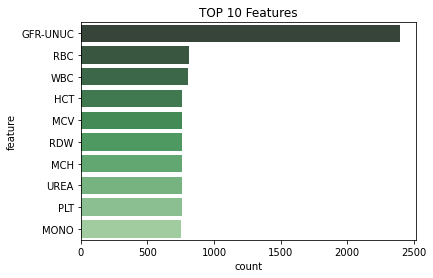

In [ ]:
# Bar Chart for TOP 10 Features
k10=[]
for row_pathology in pathology['results']:
  for item_pathology in row_pathology:
    a = remove_percentage(item_pathology)
    b = remove_number(a)
    c = remove_dot(b)
    d = remove_slash(c)
    e = remove_comma(d)
    k10.append(e)
df_feature = pd.DataFrame(k10,columns=['feature'])
df_feature.feature = df_feature.feature.str.replace(' ', '')
sns.countplot(y='feature', data=df_feature, palette="Greens_d",
              order=df_feature['feature'].value_counts().iloc[:10].index).set_title('TOP 10 Features')

In [ ]:
#Merge the table pathology and dictionary
dic_path = dic_path.rename(columns={"TLCCode": "test_name", "TLCDesc": "test_desc"})
Blood_df = pd.merge(dic_path,pathology_3,how='inner',on=['test_name'])
blood_df = Blood_df.drop(columns=['test_desc'])

#Drop duplicates
blood_3 = blood_df.drop_duplicates(subset=['test_name', 'ID','value'], keep="first")

#Pivot Table
df_p = blood_3.pivot_table(index=['ID'], columns=['test_name'], values='value', aggfunc=lambda x: "".join(x)).fillna('')

# Split ID and DATE
df_p = df_p.reset_index()
df_p1 = df_p.join(pd.DataFrame(df_p.ID.str.split(':',1).tolist(),
                                   columns = ['Id','DATE']))
cols = list(df_p1)
cols.insert(0, cols.pop(cols.index('DATE')))
cols.insert(0, cols.pop(cols.index('Id')))
df_p1 = df_p1.loc[:, cols]
df_p1 = df_p1.drop('ID',1)

In [ ]:
# Clean the table, drop column missing in more than 25% of patients
df = df_p1.replace(r'^\s*$', np.nan, regex=True)

empty_cols = [col for col in df.columns if df[col].isnull().all()]

df.drop(empty_cols, axis=1, inplace=True)

counts = df.groupby('Id', as_index=False).count()

counts = counts.replace(0, np.nan)

missing_cols = [col for col in counts.columns if counts[col].isnull().sum() > 4]   

counts.drop(missing_cols, axis=1, inplace=True)

final = list(counts.columns)
final.remove('ACT')
final.remove('DAT')
final.remove('SDA')

df_after_cleaning = df[final]

In [ ]:
# Download the Excel
from google.colab import files
df_after_cleaning.to_csv('df_after_cleaning.csv') 
files.download('df_after_cleaning.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Set the value of the cells 
df_after_cleaning['ALB'] = df_after_cleaning['ALB'].str.split(n=1).str[0]
df_after_cleaning['ALP'] = df_after_cleaning['ALP'].str.split(n=1).str[0]
df_after_cleaning['ALT'] = df_after_cleaning['ALT'].str.split(n=1).str[0]
df_after_cleaning['CA'] = df_after_cleaning['CA'].str.split(n=1).str[0]
df_after_cleaning['CL'] = df_after_cleaning['CL'].str.split(n=1).str[0]
df_after_cleaning['CREA'] = df_after_cleaning['CREA'].str.split(n=1).str[0]
df_after_cleaning['CREA'] = df_after_cleaning['CREA'].str.split(n=1).str[0]
df_after_cleaning['GLOB'] = df_after_cleaning['GLOB'].str.split(n=1).str[0]
df_after_cleaning['HCT'] = df_after_cleaning['HCT'].str.split(n=1).str[0]
df_after_cleaning['K'] = df_after_cleaning['K'].str.split(n=1).str[0]
df_after_cleaning['PHOS'] = df_after_cleaning['PHOS'].str.split(n=1).str[0]
df_after_cleaning['PLT'] = df_after_cleaning['PLT'].str.split(n=1).str[0]
df_after_cleaning['REN1'] = df_after_cleaning['REN1'].str.split(n=1).str[0]
df_after_cleaning['TBIL'] = df_after_cleaning['TBIL'].str.split(n=1).str[0]
df_after_cleaning['TP'] = df_after_cleaning['TP'].str.split(n=1).str[0]
df_after_cleaning['UREA'] = df_after_cleaning['UREA'].str.split(n=1).str[0]


df_after_cleaning['BASO'] = df_after_cleaning['BASO'].str.split(n=1).str[0]
df_after_cleaning['EOSI'] = df_after_cleaning['EOSI'].str.split(n=1).str[0]
df_after_cleaning['LYMP'] = df_after_cleaning['LYMP'].str.split(n=1).str[0]
df_after_cleaning['NEUT'] = df_after_cleaning['NEUT'].str.split(n=1).str[0]
df_after_cleaning['MONO'] = df_after_cleaning['MONO'].str.split(n=1).str[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Select columns
table_1 = Supplementary_Table[['Supplementary Table 1 Clinical and pathological characteristics of the cohort','Unnamed: 3']]
table_1.columns = ['Id','Desc']
table_2 = table_1.drop(table_1.index[21:30])
table_3 = table_2.drop(table_2.index[0:2])

# Split the Desc
table_3["Desc"]= table_3["Desc"].str.split("\n")

# Split the table 
table_4 = pd.DataFrame({'Id':np.repeat(table_3.Id.values,table_3.Desc.str.len()),
                        'b':np.concatenate(table_3.Desc.values)})

# Seperate the Column
table_5 = table_4.join(pd.DataFrame(table_4.b.str.split(':',1).tolist(),columns = ['test_name','value']))
table_5 = table_5.drop('b', 1)

# Find Breast Cancer type
br_type = table_5.loc[table_5['test_name'].isin(['type'])]
br_type

,Id,test_name,value
0,1360,type,triple negative
7,1659,type,luminal A
14,1869,type,luminal B
21,1441,type,luminal A
28,1460,type,luminal A
35,1730,type,luminal A
43,1969,type,luminal A
51,2014,type,luminal A
58,2163,type,triple negative
65,2388,type,triple negative


In [ ]:
# Select columns
table_11 = Supplementary_Table[['Supplementary Table 1 Clinical and pathological characteristics of the cohort','Unnamed: 6']]
table_11.columns = ['Id','Desc']
table_21 = table_11.drop(table_11.index[0])
table_31 = table_21.drop(table_21.index[20:29])

# Split the Desc
table_31["Desc"]= table_21["Desc"].str.split("\n")

# Split the table 
table_41 = pd.DataFrame({'Id':np.repeat(table_31.Id.values,table_31.Desc.str.len()),
                        'b':np.concatenate(table_31.Desc.values)})

# Seperate the Column
table_51 = table_41.join(pd.DataFrame(table_41.b.str.split(':',1).tolist(),columns = ['test_name','value']))
table_51 = table_51.drop('b', 1)

# Find Breast Cancer type
br_type1 = table_51.loc[table_51['test_name'].isin(['molecular subtype'])]
br_type1

,Id,test_name,value
1,1360,molecular subtype,metabolic
5,1659,molecular subtype,metabolic
11,1869,molecular subtype,metabolic
15,1441,molecular subtype,immune
21,1460,molecular subtype,immune
27,1730,molecular subtype,immune
31,1969,molecular subtype,immune
37,2014,molecular subtype,immune
43,2163,molecular subtype,immune
49,2388,molecular subtype,nc-enriched


In [ ]:
# Select columns
table_111 = Supplementary_Table[['Supplementary Table 1 Clinical and pathological characteristics of the cohort','Unnamed: 7']]
table_111.columns = ['Id','Desc']
table_211 = table_111.drop(table_111.index[0:2])
table_311 = table_211.drop(table_211.index[19:29])

# Split the Desc
table_311["Desc"]= table_311["Desc"].str.split("\n")

# Split the table 
table_411 = pd.DataFrame({'Id':np.repeat(table_311.Id.values,table_311.Desc.str.len()),
                        'b':np.concatenate(table_311.Desc.values)})

# Seperate the Column
table_511 = table_411.join(pd.DataFrame(table_411.b.str.split(':',1).tolist(),columns = ['test_name','value']))
table_511 = table_511.drop('b', 1)

# Find Breast Cancer type
br_type11 = table_511.loc[table_511['test_name'].isin(['molecular subtype'])]
br_type11

,Id,test_name,value
0,1360,molecular subtype,immune
9,1659,molecular subtype,immune
19,1869,molecular subtype,immune
28,1441,molecular subtype,immune
36,1460,molecular subtype,matrisome/EMT
45,1730,molecular subtype,immune
53,1969,molecular subtype,immune
62,2014,molecular subtype,metabolic
71,2163,molecular subtype,immune
80,2388,molecular subtype,metabolic


In [ ]:
df_table7 = pd.merge(br_type,br_type1, on=['Id'], how='left')
df_table8 = pd.merge(df_table7,br_type11, on=['Id'], how='left')
df_table8 =df_table8.drop(columns=['test_name_x','test_name_y','test_name'])
df_table8

,Id,value_x,value_y,value
0,1360,triple negative,metabolic,immune
1,1659,luminal A,metabolic,immune
2,1869,luminal B,metabolic,immune
3,1441,luminal A,immune,immune
4,1460,luminal A,immune,matrisome/EMT
5,1730,luminal A,immune,immune
6,1969,luminal A,immune,immune
7,2014,luminal A,immune,metabolic
8,2163,triple negative,immune,immune
9,2388,triple negative,nc-enriched,metabolic


In [ ]:
df_table8.columns=['patient id','histopathology cancer subtype','molecular subtype (proximal tissues)','molecular subtype(distal tissues)']
df_table8

,patient id,histopathology cancer subtype,molecular subtype (proximal tissues),molecular subtype(distal tissues)
0,1360,triple negative,metabolic,immune
1,1659,luminal A,metabolic,immune
2,1869,luminal B,metabolic,immune
3,1441,luminal A,immune,immune
4,1460,luminal A,immune,matrisome/EMT
5,1730,luminal A,immune,immune
6,1969,luminal A,immune,immune
7,2014,luminal A,immune,metabolic
8,2163,triple negative,immune,immune
9,2388,triple negative,nc-enriched,metabolic


In [ ]:
s = diagnosis_5.apply(lambda x: pd.Series(x['code']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'code'
df25 = diagnosis_5.drop('code', axis=1).join(s)
df25['code'] = pd.Series(df25['code'], dtype=object)

In [ ]:
C76 = df25[df25['code'].str.contains(r'C76(?!$)')]
C77 = df25[df25['code'].str.contains(r'C77(?!$)')]
C78 = df25[df25['code'].str.contains(r'C78(?!$)')]
C79 = df25[df25['code'].str.contains(r'C79(?!$)')]
C80 = df25[df25['code'].str.contains(r'C80(?!$)')]

In [ ]:
df_C77 = pd.merge(C77,C77,'left', on=['ID'])

In [ ]:
df_C76 = C76.set_index(['ID', C76.groupby('ID').cumcount()])['code'].unstack().add_prefix('code').reset_index()
df_C77 = C77.set_index(['ID', C77.groupby('ID').cumcount()])['code'].unstack().add_prefix('code').reset_index()
df_C78 = C78.set_index(['ID', C78.groupby('ID').cumcount()])['code'].unstack().add_prefix('code').reset_index()
df_C79 = C79.set_index(['ID', C79.groupby('ID').cumcount()])['code'].unstack().add_prefix('code').reset_index()
df_C80 = C80.set_index(['ID', C80.groupby('ID').cumcount()])['code'].unstack().add_prefix('code').reset_index()

In [ ]:
df_code1 = pd.merge(df_C76,df_C77,how='outer',on=['ID'])
df_code2 = pd.merge(df_code1,df_C78,how='outer',on=['ID'])
df_code3 = pd.merge(df_code2,df_C79,how='outer',on=['ID'])
df_code4 = pd.merge(df_code3,df_C80,how='outer',on=['ID'])

In [ ]:
df_code4['C76-C80'] = df_code4[df_code4.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [ ]:
df_code4.drop(df_code4.columns[[1,2,3,4,5,6]], axis=1, inplace=True)

In [ ]:
df_code4.columns = ['patient id','C76-C80']

In [ ]:
df_table9 = pd.merge(df_table8,df_code4,how='left',on=['patient id'])

In [ ]:
# Convert the data type
df_after_cleaning['Id'] = df_after_cleaning['Id'].astype(int)
br_type['Id'] = br_type['Id'].astype(int)
df_table = pd.merge(df_after_cleaning,br_type,how='left',on=['Id'])
df_table = df_table.drop('test_name', 1) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_id = df_table[['Id']]
df_id= df_id.drop_duplicates(subset=['Id'], keep="first")
df_id

In [ ]:
df_type= pd.merge(df_id,br_type,how='left',on=['Id'])
df_type

,Id,test_name,value
0,1360,type,triple negative
1,1441,type,luminal A
2,1476,type,luminal A
3,1536,type,luminal A
4,1659,type,luminal A
5,1691,type,luminal B
6,1730,type,luminal A
7,1777,type,luminal A
8,1779,type,luminal A
9,1823,type,luminal A


In [ ]:
df_table

,Id,DATE,ALB,ALP,ALT,BASO,CA,CL,CREA,EOSI,GLOB,HCT,K,LYMP,MONO,NEUT,PHOS,PLT,REN1,TBIL,TP,UREA,DIAGNOSIS
0,1360,01-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,triple negative
1,1360,01-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,triple negative
2,1360,06-01-12,45,73,22,0.0,2.32,105,64,0.1,25,0.39,4.4,1.4,0.1,3.1,1.10,219,NaN,6,70,4.2,triple negative
3,1360,06-02-12,45,70,39,0.1,2.47,107,79,0.1,27,0.37,4.2,2.1,0.6,2.9,1.32,292,NaN,2,72,3.9,triple negative
4,1360,07-08-15,39,81,13,0.0,2.26,104,74,0.2,30,0.37,5.1,2.9,0.5,6.8,1.20,302,NaN,2,69,6.3,triple negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,2389,17-03-19,NaN,NaN,NaN,0.1,NaN,102,NaN,0.1,NaN,0.39,3.8,2.9,0.6,6.8,NaN,352,NaN,NaN,NaN,4.5,luminal A
1143,2389,18-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,luminal A
1144,2389,18-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,luminal A
1145,2389,25-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,luminal A


In [ ]:
# Download the Excel
from google.colab import files
df_table.to_csv('df_table.csv') 
files.download('df_table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_table= df_table.rename(columns={'value': 'DIAGNOSIS'})
df_table1= df_table.loc[:, 'ALB':'DIAGNOSIS']


In [ ]:
# Download the Excel
from google.colab import files
df_table1.to_csv('df_table1.csv') 
files.download('df_table1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#df_table2 = df_table2.drop('Unnamed: 0', 1) 
df_table_mean = df_table2.groupby('DIAGNOSIS').mean()

In [ ]:
df_table_mean

,Unnamed: 0,ALB,ALP,ALT,BASO,CA,CL,CREA,EOSI,GLOB,K,LYMP,MONO,NEUT,PHOS,PLT,REN1,TBIL,TP,UREA
DIAGNOSIS,,,,,,,,,,,,,,,,,,,,
luminal A,515.813983,41.171429,64.338095,21.453333,0.007143,2.251786,99.945080,287.365591,0.101891,26.094987,4.373134,1.317227,0.371429,3.113445,1.377455,174.723493,2.00,10.116711,67.357895,10.036534
luminal B,255.400000,47.288462,66.386364,19.020408,0.003016,2.504146,102.695652,59.172414,0.037891,24.409091,4.296429,1.134047,0.414078,2.610969,1.011951,236.619048,1.75,4.880952,71.777778,4.059184
triple negative,867.542553,40.528000,86.483871,76.159664,0.019380,2.266321,100.351562,48.015748,0.106977,28.844262,4.067742,1.386047,0.506202,4.561240,0.960190,281.728682,2.00,4.786885,69.590164,3.725781


In [ ]:
# Download the Excel
from google.colab import files
df_table_mean.to_csv('df_table_mean.csv') 
files.download('df_table_mean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Check the missing value of data 
pathology.isnull().sum()

id              0
order_date      0
details       306
tlcs          208
results         0
combined        0
dtype: int64

### TABLE Pharmacy

The columns in TABLE Pharmacy includes ID, Order date, Details. Order Date is the date when the patients get the pharmacy instruction.
Details is the details of pharmacy.

The Process includes:
*   Check missing value
*   Extract medicine name from the cell
*   Bar chat of TOP 10 Medicine
*   Word Cloud for Treatment



In [ ]:
# Check the head of data 
pharmacy.head()

,id,order_date,details
0,1659,24-09-13,OXCARBAZEPINE Tablet 300mg
1,1659,25-10-13,CODEINE PHOSPHATE Tablet 30mg;GOSERELIN Inject...
2,1659,14-02-14,GOSERELIN Injection 3.6mg;PHENOXYMETHYLPENICIL...
3,1659,17-10-14,GOSERELIN Injection 3.6mg
4,1691,26-07-13,LANSOPRAZOLE Capsule 30mg


In [ ]:
pharmacy_1111 = pharmacy['id']
pharmacy_1111.drop_duplicates(keep = "first") 

0      1659
4      1691
17     1777
46     1779
53     1823
66     1869
89     2014
102    2069
129    2163
138    2183
167    2382
189    2388
Name: id, dtype: int64

In [ ]:
# Drop duplicated data
pharmacy.drop_duplicates()

#Split the cell, format datetime
pharmacy["details"]= pharmacy["details"].str.split(";")
pharmacy["order_date"] = pd.to_datetime(pharmacy["order_date"])


In [ ]:
# Import the column into list
k = []
# Import the column into list
for row in pharmacy['details']:
  for item in row:
    # Any word character
    wordList = re.sub("[^\w]", " ",item).split()
    temp = []
    for f in wordList:
      if f.isupper() == True:
        temp.append(f)
    k.append(" ".join(sorted(set(temp), key=temp.index)))

In [ ]:
# Remove the duplicated items with different doses 
def removeDuplicate(str): 
    index = 0
    for i in range(0, len(str)): 
        for j in range(0, i+1): 
            if (str[i] == str[j]): 
                break
        if (j == i): 
            str[index] = str[i] 
            index += 1      
    return "".join(str[:index]) 
temp1=[]
for i in k:
  a = removeDuplicate(list(i))
  temp1.append(i)

In [ ]:
# Remove 'PREFILLED SYRING'
special = 'PREFILLED SYRING' 
#special_1 = 'NAMED PATIENT PROGRAM'
temp1[:] = [item.rstrip(special) for item in temp1]
#temp1[:] = [item.rstrip(special_1) for item in temp1]

Text(0.5, 1.0, 'TOP 10 Medicine')

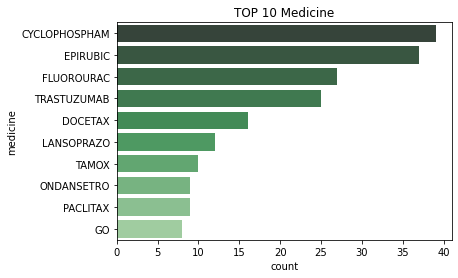

In [ ]:
# Bar chart for top 10 medicine
df1 = pd.DataFrame(temp1,columns=['medicine'])
sns.countplot(y='medicine', data=df1, palette="Greens_d",
              order=df1['medicine'].value_counts().iloc[:10].index).set_title('TOP 10 Medicine')

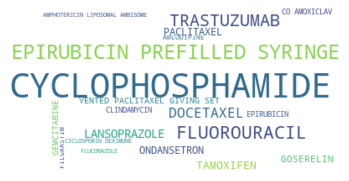

In [ ]:
# Word Cloud for Medicine
counts = df1['medicine'].value_counts()
counts.index = counts.index.map(str)
wordcloud = WordCloud(max_font_size=500, max_words=20, background_color="white").generate_from_frequencies(counts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
pharmacy_1

,Column1
0,ACICLOVIR Tablet 400mg
1,ADCAL D3 Chewable tablet
2,ADCAL D3 Effervescent tablet
3,ALEMTUZUMAB Injection 30mg in 1ml
4,ALFACALCIDOL Capsule 0.25micrograms
...,...
125,TAMOXIFEN Tablet 10mg
126,TAMOXIFEN Tablet 20mg
127,TRASTUZUMAB Injection 600mg in 5ml
128,TRASTUZUMAB Injection 150mg


In [ ]:
# Convert dataframe to List
drug_list = drug_file['drug'].values.tolist()
pharmacy_1 = df1['medicine'].values.tolist()


In [ ]:
pharmacy_2 = set(pharmacy_1)
pharmacy_3 = list(pharmacy_2)

In [ ]:
# Extract drug name from HTML file and merge it with Table pharmacy
drugs = []
drugs_lower = []
drugs_description = []
for i in range(len(drug_list)):
  for j in pharmacy_3 :
    if "<name>" in drug_list[i]:
      temp = drug_list[i].replace("<name>", "").replace("</name>", "").strip().lower()
      if j.lower() == temp or temp == j.lower():
        drugs.append(j)
        drugs_lower.append(drug_list[i].replace("<name>", "").replace("</name>", "").strip())
        drugs_description.append(drug_list[i+1].replace("<description>", "").replace("</description>", ""))
d = pd.DataFrame({'DRUG':drugs,'Drug':drugs_lower,'Description':drugs_description})


In [ ]:
d

,DRUG,Drug,Description
0,GOSERELIN,Goserelin,"Goserelin is a synthetic hormone. In men, it s..."
1,TRASTUZUMAB,Trastuzumab,"Produced in CHO cell cultures, trastuzumab is ..."
2,FILGRASTIM,Filgrastim,Chemotherapy-induced neutropenia (CIN) is a co...
3,RAMIPRIL,Ramipril,Ramipril is a prodrug belonging to the angiote...
4,LORAZEPAM,Lorazepam,Lorazepam is a short-acting and rapidly cleare...
5,FLUCONAZOLE,Fluconazole,"Fluconazole, commonly known as _Diflucan_, is ..."
6,OSELTAMIVIR,Oseltamivir,Oseltamivir (marketed as the product Tamifluâ“...
7,PREGABALIN,Pregabalin,Pregabalin is structurally similar to gamma-am...
8,PHENYTOIN,Phenytoin,Phenytoin is classified as a hydantoin derivat...
9,DOXYCYCLINE,Doxycycline,Doxycycline is a broad-spectrum antibiotic syn...


In [ ]:
# Download the Excel
from google.colab import files
d.to_csv('drug_match.csv') 
files.download('drug_match.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Check the missing value of data
pharmacy.isnull().sum()

### TABLE Demographics and TABLE Pathology

 We can find information of patiens' gender and age in the column “results” in the pathology table. Since some data in TABLE Demographics is inconsistent. We can map it with these information. 

 The plots include:

 * Extract features of gender and age in the pathology table and replace it to the demographic table.
 * Pie chart for the ethnicity

In [ ]:
# Merge table demographics and pathology
new_df1['Gender'] = 'Female'
new_df2=new_df1.drop(columns=['gender', 'sex'])
new_df2.loc[17] = [2188, 'Unknown', 'Unkown','Female']  
new_df2 = new_df2.sort_index() 
new_df2.drop([10])
new_df3 = pd.merge(new_df2,AGE,how='left',on=['id'])
new_df3=new_df3.drop(columns=['test_name'])
new_df3.replace(np.nan,'Unknown')

,id,ethnicity_group,ethnicity,Gender,AGE
0,1360,Asian,Black or Black British - Any other,Female,Unknown
1,1441,Asian,White - British,Female,Unknown
2,1476,Asian,Other ethnic group - Any other,Female,52
3,1536,Asian,White - British,Female,49
4,1659,Mixed,White - Other,Female,Unknown
5,1691,Asian,Other ethnic group - Any other,Female,Unknown
6,1777,Asian,Asian or Asian British - Any other background,Female,39
7,1779,Asian,White - British,Female,Unknown
8,1823,Asian,White - British,Female,53
9,1823,Asian,White - British,Female,53


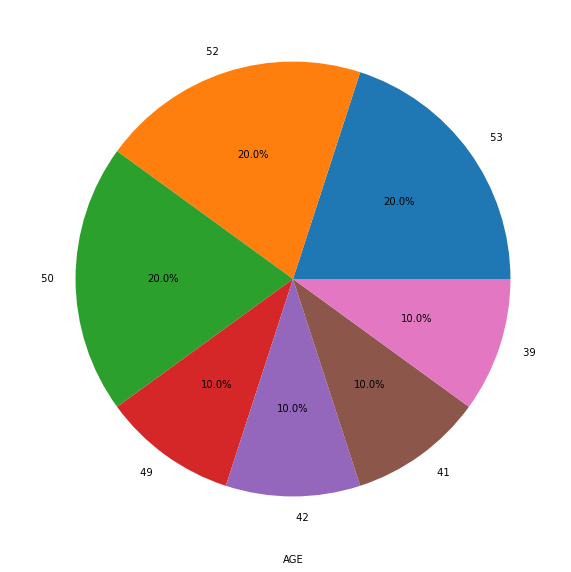

In [ ]:
# Pie chart for age
AGE = new_df3.groupby('AGE')
plt.figure(figsize=(15,10))
AGE.size().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.xlabel("AGE")
plt.ylabel(" ")
plt.show()

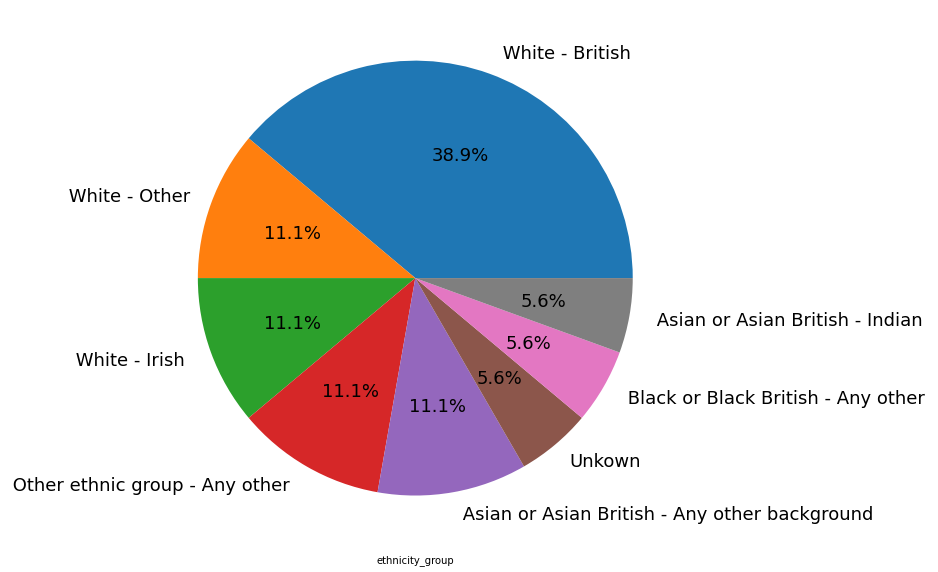

In [ ]:
# Pie chart for all ethnicity
ethnicity = new_df3.groupby('ethnicity')
plt.figure(figsize=(15,10))
ethnicity.size().sort_values(ascending=False).plot.pie(autopct='%1.1f%%',textprops={'fontsize': 18})
plt.xlabel("ethnicity_group")
plt.ylabel(" ")
plt.show()

## Ontology Mapping from SNOMED CT compared to ICD-10
The dictionary used in this paper to map from ICD-10 TO SNOMED CT is SNOMED CT to ICD-10-CM Map organised by National Library of Medicine, which can be download from “https://www.nlm.nih.gov/research/umls/mapping_projects/snomedct_to_icd10cm.html”

The columns in this dictionary include: ICD-10 CM Code, ICD-10 CM description, SNOMED CT, SNOMED CT description, map advice. The main difference between ICD-10 and ICD-10 CM is ICD-10 CM contains '.' Remove '.' and convert it into ICD-10 so that data can be easier to analyse. 

Use fuzzywuzzy library to do the string-matching.
There are four functions in fuzzy string-matching library: ratio, partial ratio, token sort ratio and token set ratio.


*   Ratio function compares the entire string similarity, which is sensitive to minor differences in word order, missing words, and other such issues. 
*   Partial ratio function compares partial string similarity. 
*   Token sort ratio function ignores word order.
*   Token set ratio function ignores duplicated words


Choose the most suitable function by using 20 samples and comparing the result of these four functions.

After calculating, the results are as follows:

**Ratio function** leads to 9 out of 20 beat matches
**Partial ratio** function leads to 11 out of 20 beat matches
**Token set ratio** function leads to 11 out of 20 beat matches
**Token sort ratio** function leads to 14 out of 20 beat matches.

According to the results, we choose **token sort ratio function** as the string-matching function.

Finally, map ICD-10 to SNOMED CT in TABLE Diagnosis.


In [ ]:
# Remove '.' in the mapTarget
dic_snomed['mapTarget'] = dic_snomed['mapTarget'].str.replace('.','')

# Format the ICD-10 Code
dic_snomed['mapTarget'] = dic_snomed['mapTarget'].str[0:4]

In [ ]:
# Merge the Table Map and TABLE Diagnosis
a_diagnosis.columns=['mapTarget','desc']
map_1d = pd.merge(a_diagnosis,dic_snomed,how='left',on=['mapTarget'])
map_2d = map_1d[['mapTarget','referencedComponentId','referencedComponentName','desc']]
map_2d.drop_duplicates(subset=['referencedComponentName'], keep= False)
map_3d= map_2d.drop_duplicates(['mapTarget', 'referencedComponentId'])
map_4d = map_3d.dropna()

In [ ]:
def match_string(ICD):
    k = map_4d.loc[map_4d['mapTarget'] == ICD ]
    Col1 = k['desc']
    Col2 = k['referencedComponentName']
    
    # Fuzzywuzzy string macth using partial ratio
    overall_1=[]
    for n in Col1:
        result=[(fuzz.partial_ratio(n, n2),n2) 
                for n2 in Col2 if fuzz.partial_ratio(n, n2)>=0
               ]
        if len(result):
            result.sort(reverse=True)    
            overall_1.append(result)
        else:
            overall_1.append(" ")
    partial_ratio = overall_1[0]
    print("ICD-10 Code is:")
    print(ICD)
    print("ICD_10 description is:")
    print(k['desc'].iloc[0])
    print("Best Match for partial ratio function:")
    print(partial_ratio[0])

    # Fuzzywuzzy string macth using ratio
    overall_2=[]
    for n in Col1:
        result=[(fuzz.ratio(n, n2),n2) 
                for n2 in Col2 if fuzz.ratio(n, n2)>=0
               ]
        if len(result):
            result.sort(reverse=True)    
            overall_2.append(result)
        else:
            overall_2.append(" ")
    ratio = overall_2[0]
    print("Best Match for ratio function:")
    print(ratio[0])


    # Fuzzywuzzy string macth using  token sort ratio
    overall_3=[]
    for n in Col1:
        result=[(fuzz.token_sort_ratio(n, n2),n2) 
                for n2 in Col2 if fuzz.token_sort_ratio(n, n2)>=0
               ]
        if len(result):
            result.sort(reverse=True)    
            overall_3.append(result)
        else:
            overall_3.append(" ")
    token_sort_ratio = overall_3[0]
    print("Best Match for token sort ratio function:")
    print(token_sort_ratio[0])

    # Fuzzywuzzy string macth using  token set ratio
    overall_4=[]
    for n in Col1:
        result=[(fuzz.token_set_ratio(n, n2),n2) 
                for n2 in Col2 if fuzz.token_set_ratio(n, n2)>=0
               ]
        if len(result):
            result.sort(reverse=True)    
            overall_4.append(result)
        else:
            overall_4.append(" ")
    token_set_ratio = overall_4[0]
    print("Best Match for token set ratio function:")
    print(token_set_ratio[0])
    print("------------------------------------------------")
    pass

In [ ]:
map_6d = map_4d[['mapTarget']]
map_7d= map_6d.drop_duplicates(['mapTarget'])
list_ICD_d=[]
for rows in map_7d['mapTarget']:
  list_ICD_d.append(rows)
ICD_sample=list_ICD_d[0:20]

In [ ]:
for i in range(0,len(ICD_sample)):
  match_string(ICD_sample[i])

ICD-10 Code is:
C509
ICD_10 description is:
Malignant neoplasm: Breast, unspecified
Best Match for partial ratio function:
(73, 'Malignant neoplasm of male breast')
Best Match for ratio function:
(67, 'Malignant neoplasm of male breast')
Best Match for token sort ratio function:
(77, 'Primary malignant neoplasm of breast')
Best Match for token set ratio function:
(86, 'Malignant neoplasm of male breast')
------------------------------------------------
ICD-10 Code is:
Z511
ICD_10 description is:
Chemotherapy session for neoplasm
Best Match for partial ratio function:
(58, 'Chemotherapy changed - progressive disease during chemotherapy')
Best Match for ratio function:
(54, 'Chemotherapy changed - patient choice')
Best Match for token sort ratio function:
(62, 'Reason for change in planned chemotherapy treatment')
Best Match for token set ratio function:
(65, 'Reason for change in planned chemotherapy treatment')
------------------------------------------------
ICD-10 Code is:
C503
ICD_1

In [ ]:
# Use token sort ration function to do the string match for diagnosis table
def match_fuzz_diagnosis(ICD):
    k = map_4d.loc[map_4d['mapTarget'] == ICD ]
    Col1 = k['desc']
    Col2 = k['referencedComponentName']
    not_find  = 'Not Find'

# Fuzzywuzzy string macth using  token sort ratio for diagnosis table
    overall_5=[]
    for n in Col1:
        result=[(fuzz.token_sort_ratio(n, n2),n2) 
                for n2 in Col2 if fuzz.token_sort_ratio(n, n2)>=65
               ]
        if len(result):
          result.sort(reverse=True)    
          overall_5.append(result)
          return overall_5[0][0]
        else:
          return [0,'Not Find']

In [ ]:

# List for the chosen SNOMED CT Description
fuzz_b = []
for item in list_ICD_d:
  fuzz_b.append(list(match_fuzz_diagnosis(item))[1])

# List for corresponding ICD-10 Code
fuzz_c = []
for item in list_ICD_d:
  fuzz_c.append(item)

# Convert these two lists to data frame
fuzz_d = list(zip(fuzz_c,fuzz_b))
fuzzy_e = pd.DataFrame(fuzz_d,columns=['mapTarget','referencedComponentName'])

# Merge two tables, Convert ICD-10 to SNOMED CT
fuzzy_f = pd.merge(fuzzy_e, map_4d,  how='left', on=['mapTarget','referencedComponentName'])
fuzzy_f.columns=['ICD_10','SNOMED CT Description','SNOMED_CT', 'ICD-10 Description']
fuzzy_f['SNOMED_CT'].fillna('Not Find', inplace=True)


In [ ]:
diagnosis.head()

,id,date,code,desc
0,1360,2011-12-29,"[C509, Z511]","[Malignant neoplasm: Breast, unspecified, Chem..."
1,1360,2012-06-01,[C509],"[Malignant neoplasm: Breast, unspecified]"
2,1360,2012-11-01,"[Z452, C503, Z901]",[Adjustment and management of vascular access ...
3,1360,2012-01-16,"[C509, Z901, R458, Z082]","[Malignant neoplasm: Breast, unspecified, Acqu..."
4,1360,2012-01-18,"[C509, Z511, R458, Z901]","[Malignant neoplasm: Breast, unspecified, Chem..."


In [ ]:
# Merge diagnosis table with dictionary
dict_diagnosis = pd.Series(fuzzy_f.SNOMED_CT.values,index=fuzzy_f.ICD_10).to_dict()
diagnosis_mapping = diagnosis.assign(SNOMED_CT=[[dict_diagnosis[k] for k in row if dict_diagnosis.get(k)] for row in diagnosis.code])

diagnosis_map=diagnosis_mapping[['id','date','code','SNOMED_CT','desc']]
diagnosis_map.columns=['id','date','ICD-10code','SNOMED_CT','ICD-10 desc']
diagnosis_maps = diagnosis_map.drop(['ICD-10 desc'], axis=1)
diagnosis_maps

,id,date,ICD-10code,SNOMED_CT
0,1360,2011-12-29,"[C509, Z511]","[372137005.0, Not Find]"
1,1360,2012-06-01,[C509],[372137005.0]
2,1360,2012-11-01,"[Z452, C503, Z901]","[373080008.0, 721551005.0]"
3,1360,2012-01-16,"[C509, Z901, R458, Z082]","[372137005.0, 721551005.0, Not Find]"
4,1360,2012-01-18,"[C509, Z511, R458, Z901]","[372137005.0, Not Find, Not Find, 721551005.0]"
...,...,...,...,...
378,2388,2016-01-03,"[E119, C503, I10X, Z901]","[237599002.0, 373080008.0, 721551005.0]"
379,2388,2016-08-03,"[C509, E119, I10X, Z901]","[372137005.0, 237599002.0, 721551005.0]"
380,2388,2016-03-30,"[C509, I10X, M139, E119, Z901, Z880]","[372137005.0, 237599002.0, 721551005.0, 294504..."
381,2388,2016-03-31,"[Z880, M139, C509, E119, Z901, I10X]","[294504007.0, 372137005.0, 237599002.0, 721551..."
